In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
absolute_path = "/Users/joaosousa/Desktop/Ironhack/5th_week/amz_uk_price_prediction_dataset.csv"

df = pd.read_csv(absolute_path)


In [96]:
df.head()


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category,price_without_outliers
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers,21.99
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers,23.99
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers,21.99
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers,31.99
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers,17.99


In [119]:
df.dtypes

uid                         int64
asin                       object
title                      object
stars                     float64
reviews                     int64
price                     float64
isBestSeller                 bool
boughtInLastMonth           int64
category                   object
price_without_outliers    float64
dtype: object

In [4]:
#Create a crosstab between the product category and the isBestSeller status.



In [26]:
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])

crosstab_result

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [6]:
#Are there categories where being a best-seller is more prevalent?

#Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.

In [10]:
df["category"].value_counts()

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [20]:
best_seller_counts = df[df['isBestSeller'] == True]['category'].value_counts()
best_seller_counts_f = df[df['isBestSeller'] == False]['category'].value_counts()


In [17]:
best_seller_counts


category
Grocery                   556
Health & Personal Care    552
Baby                      341
Sports & Outdoors         330
Power & Hand Tools        306
                         ... 
Cycling Shoes               1
Tennis Shoes                1
USB Hubs                    1
Desktop PCs                 1
Camcorders                  1
Name: count, Length: 260, dtype: int64

In [21]:
best_seller_counts_f

category
Sports & Outdoors                         835935
Handmade Clothing, Shoes & Accessories     19215
Bath & Body                                19059
Beauty                                     19010
Birthday Gifts                             18943
                                           ...  
Motorbike Chassis                            107
Alexa Built-In Devices                       106
Plugs                                        106
Smart Home Security & Lighting                98
Smart Speakers                                53
Name: count, Length: 296, dtype: int64

In [ ]:
#Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.

In [25]:
from scipy.stats import chi2_contingency

chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

(36540.20270061387, 0.0)

In [ ]:
#Compute Cramér's V to understand the strength of association between best-seller status and category.


In [27]:

from scipy.stats.contingency import association

association(crosstab_result, method="cramer")

0.1222829439760564

In [28]:
#Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

<Axes: xlabel='isBestSeller'>

<Figure size 2000x1500 with 0 Axes>

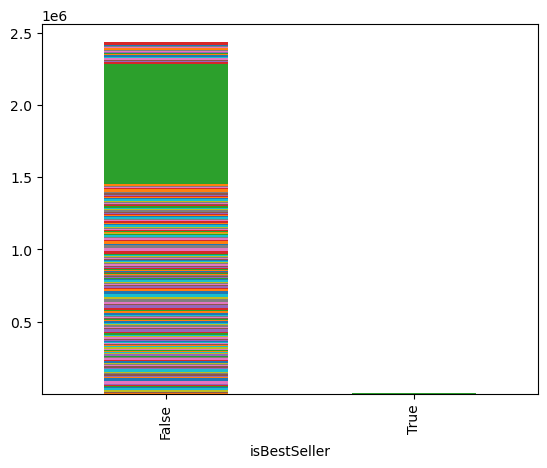

In [36]:
plt.figure(figsize=(20, 15))
crosstab_result_2 = pd.crosstab(df['isBestSeller'], df['category'])



crosstab_result_2.plot(kind="bar", stacked=True, legend=False)



In [ ]:
#Preliminary Step: Remove outliers in product prices.



In [56]:
def remove_tukeys_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove the outliers
    data_without_outliers = data[(data >= lower_bound) & (data <= upper_bound)]

    return data_without_outliers


In [80]:
data_series = df['price']  # Replace 'price' with your specific column name
data_without_outliers = remove_tukeys_outliers(data_series)
print(data_without_outliers)

0          21.99
1          23.99
2          21.99
3          31.99
4          17.99
           ...  
2443646    22.34
2443647    97.99
2443648    52.99
2443649    79.99
2443650    53.99
Name: price, Length: 2115963, dtype: float64


In [88]:
df['price_without_outliers'] = remove_tukeys_outliers(df['price'])


In [ ]:
#Violin Plots:



In [79]:
top_20_categories = df['category'].value_counts().nlargest(20).index
filtered_df = df[df['category'].isin(top_20_categories)]

# Remove outliers from the 'price' column
filtered_df['price_without_outliers'] = remove_tukeys_outliers(filtered_df['price'])

/var/folders/d8/knczg5hs597_plsphx_dp9kh0000gn/T/ipykernel_13377/3103433336.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['price_without_outliers'] = remove_tukeys_outliers(filtered_df['price'])


<Axes: xlabel='price_without_outliers', ylabel='category'>

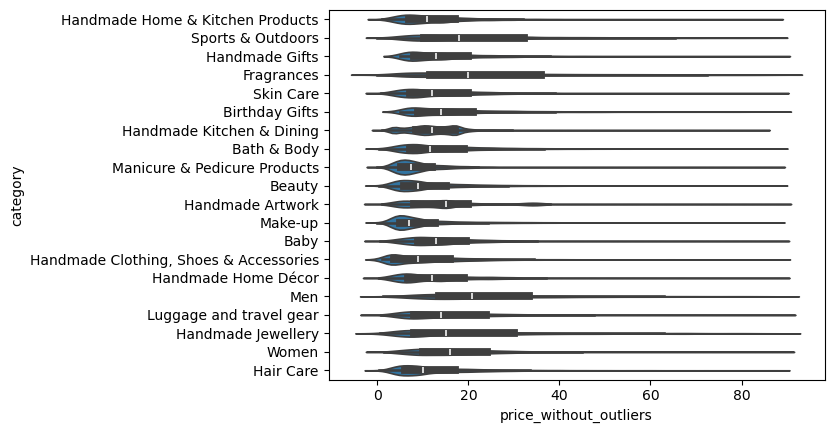

In [69]:
sns.violinplot(x='price_without_outliers', y='category', data=filtered_df)

In [ ]:
#Which product category tends to have the highest median price? Don't filter here by top categories.


In [75]:
median_prices_without_outliers = df.groupby('category')['price_without_outliers'].median()

# Find the category with the highest median price
category_with_highest_median_price_without_outliers = median_prices_without_outliers.idxmax()
highest_median_price_without_outliers = median_prices_without_outliers.max()

In [76]:
category_with_highest_median_price_without_outliers

'Desktop PCs'

In [72]:
highest_median_price_without_outliers

74.0

In [77]:
#Bar Charts:

#Create a bar chart comparing the average price of products for the top 10 product categories (based on count).


In [89]:
average_price_by_category_without_outliers = df.groupby('category')['price_without_outliers'].mean()

# Select the top 10 product categories based on count
top_10_categories_without_outliers = average_price_by_category_without_outliers.nlargest(10)



<Axes: xlabel='category'>

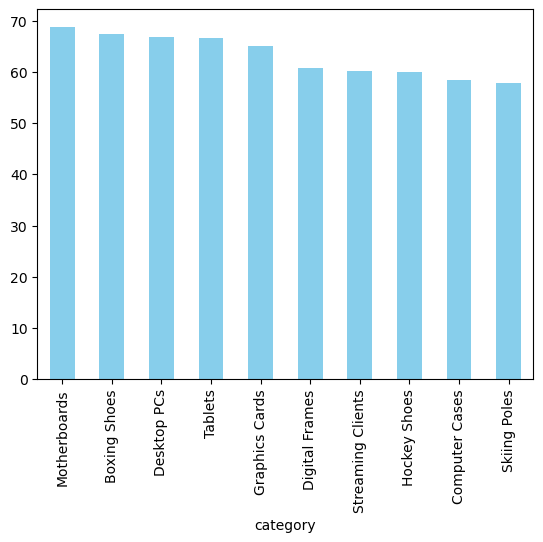

In [90]:
top_10_categories_without_outliers.plot(kind='bar', color='skyblue')


In [93]:
average_price_by_category = df.groupby('category')['price'].mean()

category_with_highest_avg_price = average_price_by_category.idxmax()
highest_avg_price = average_price_by_category.max()

In [94]:
category_with_highest_avg_price

'Laptops'

In [95]:
highest_avg_price

1087.987826986755

In [ ]:
#Box Plots:

#Visualize the distribution of product ratings based on their category using side-by-side box plots.
#Filter out the top 10 categories based on count for better visualization.

In [100]:
top_10_categories = df['category'].value_counts().nlargest(10).index
df_top_10_categories = df[df['category'].isin(top_10_categories)]


<Axes: xlabel='stars', ylabel='category'>

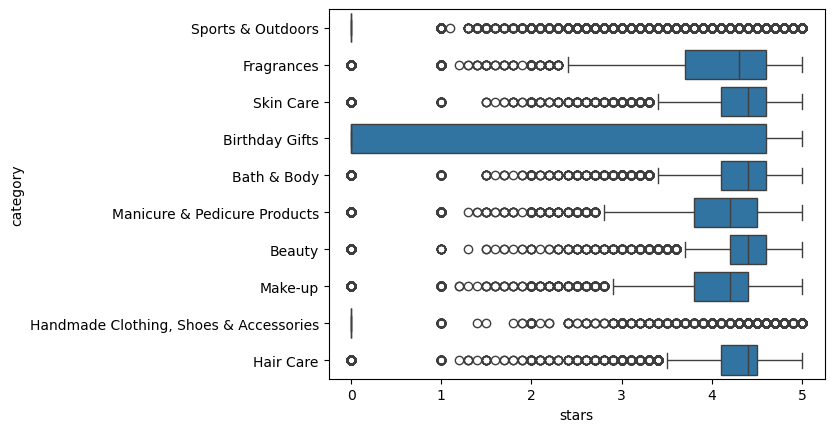

In [104]:
sns.boxplot(x='stars', y='category', data=df_top_10_categories)

In [105]:
median_rating_by_category = df.groupby('category')['stars'].median()

category_with_highest_median_rating = median_rating_by_category.idxmax()
highest_median_rating = median_rating_by_category.max()

In [106]:
category_with_highest_median_rating

'Computer Memory'

In [107]:
highest_median_rating

4.7

In [ ]:
#Correlation Coefficients:

#Calculate the correlation coefficient between price and stars.

In [108]:
correlation = df['price'].corr(df['stars'])
correlation

-0.1249067326214861

In [109]:
correlation = df['price'].corr(df['stars'], method='spearman')
correlation

-0.1331642546243379

In [110]:
#Is there a significant correlation between product price and its rating?


In [113]:
''' 
no, doesn't exist 

'''

" \nno, doesn't exist \n\n"

In [116]:
#Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?


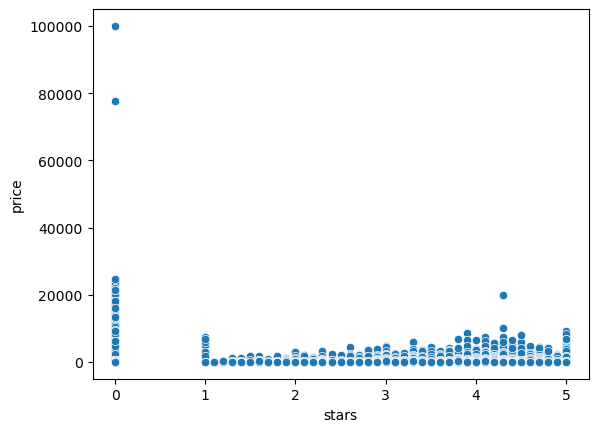

In [115]:
sns.scatterplot(data=df, x='stars', y='price');

In [ ]:
#Use a correlation heatmap to visualize correlations between all numerical variables.


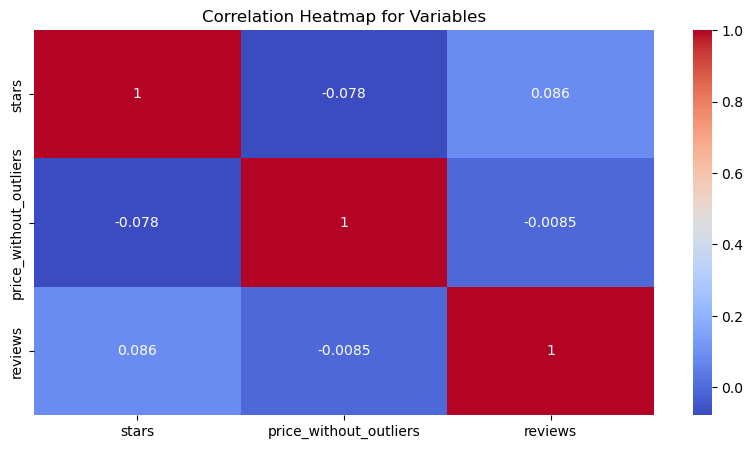

In [125]:
# Select the numerical variables
numerical_variables = ['stars', 'price_without_outliers', "reviews"]

# Calculate the correlation matrix
correlation_matrix = df[numerical_variables].corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(10, 5))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Variables")
plt.show()

In [ ]:
#Examine if product prices typically follow a normal distribution using a QQ plot.


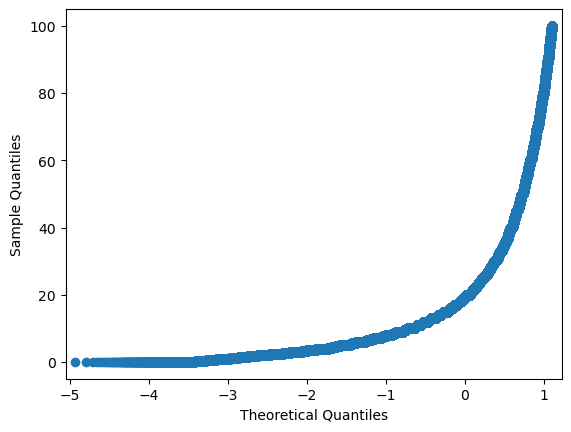

In [124]:
import statsmodels.api as sm

# Generating a Q-Q plot for 'price_without_outliers' to check if its distribution follows a normal distribution
sm.qqplot(df['price_without_outliers'], line='s');